In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).mean()

In [3]:
class Knn_classifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'): 
     
        if(metric == 'l2'):   
            distances = np.sqrt(np.sum((self.train_images - test_image) ** 2, axis = 1))
        elif(metric == 'l1'):
            distances = np.sum(abs(self.train_images - test_image), axis = 1)
        else:
            print('Error! Metric {} is not defined!'.format(metric))
            
        print(distances)
            
        sort_index = np.argsort(distances)
        sort_index = sort_index[:num_neighbors]
        nearest_labels = self.train_labels[sort_index]
        histc = np.bincount(nearest_labels)
        
        return np.argmax(histc)
    
              
    def classify_images(self, test_images, num_neighbors = 3, metric = 'l2'):
        num_test_images = test_images.shape[0] 
        predicted_labels = np.zeros((num_test_images))
        
        for i in range(num_test_images): 
            predicted_labels[i] = self.classify_image(test_images[i, :], num_neighbors = num_neighbors, metric = metric)
        
        return predicted_labels

In [4]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt')
train_labels = train_labels.astype(int)

test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt') 
test_labels = test_labels.astype(int)

In [5]:
classifier = Knn_classifier(train_images, train_labels)

In [6]:
predicted_labels = classifier.classify_images(test_images, 3, 'l2')

[2985.81094512 2625.78178834 2973.21913084 2542.08713462 3061.13345021
 2457.69261707 2730.24687528 2571.89210505 2730.55140951 3092.37901946
 2545.78632253 2900.84367038 2545.84327876 2424.04311018 2891.52624059
 2883.69502548 2970.12861674 2702.73750113 2633.28597004 2832.45388312
 2547.9994113  2521.68574569 2473.84053649 2585.94025453 2202.05631172
 2412.15982058 2482.07876587 2675.82342467 2641.98940195 3198.2948582
 2456.16835742 2403.78098004 2749.62451982 2756.41524448 2354.7870392
 2567.18094415 2183.74700916 2535.71843863 2612.19543679 3038.77722119
 2600.66049303 2735.5992031  2441.25725805 2769.79511878 2637.75889725
 2540.80991025 2819.25628491 2518.25415715 2451.86989867 2634.14540221
 2510.09661169 2402.30326978 2971.9986541  2535.5565464  3101.47738989
 2495.74698237 2809.05072934 2709.06293762 2793.64958433 2726.29858966
 2765.76716301 2828.47891984 2796.18060933 2906.53195406 2554.61777963
 2440.57677609 2589.57139311 2797.51425376 2764.17311325 2606.57572305
 2691.26

[3121.26416697 1943.77802231 2691.90062967 1875.43115043 2650.99132401
 2472.69731265 2422.12200353 2029.66253353 2791.51285148 3000.51112313
 2471.35003591 2278.36103373 2206.35831179 1536.22784768 2142.87680467
 2648.38554595 2750.7542602  2273.36688636 1876.76370383 2405.35319652
 2295.62496937 2480.93208291 1798.52550719 2843.00721068 2567.77822251
 2116.08695474 2007.00124564 2446.4382273  2697.3700154  3284.91171875
 2144.23832631 2176.02481603 2149.44318371 2725.083118   2659.75318404
 1918.8447045  2512.80799107 1680.63291649 2315.29954865 2721.52898202
 1683.024064   2597.21427687 1901.15964611 2718.0967606  1933.08587497
 2018.76100616 2584.93307457 2483.40713537 1742.43364293 2202.9763957
 2390.23597161 2719.30800021 2810.36385545  798.46101971 2515.8980504
 2045.20512419 2316.74448311 2543.42348027 2586.64396468 2163.93876993
 2152.70411344 2191.14399344 2284.3176224  2187.16003072 2231.7838157
 2333.99185945 2421.46587835 2788.33086272 2394.97348628 2735.06014559
 1084.646

[3335.33071823 2105.13229988 2534.08484467 2309.68287867 2956.82058976
 2558.73816558 2109.04385919 2093.50256747 3113.55439972 2672.17476973
 2246.32366323 2315.81087311 2311.85553182 2014.13579483 2209.36416193
 2784.12984611 2420.28841257 2326.20979277 2004.99451371 2090.90339327
 2481.11487038 2845.03022831 2007.55846739 2619.64253287 2193.96763878
 2505.16526401 2223.93952256 2847.60653883 2639.22526511 3152.94909569
 2398.42802685 2518.89281233 2443.14408089 2679.72181392 2461.45769819
 2029.68913876 2385.32031392 2122.27283826 2389.91108621 2951.00881056
 1969.85405551 2669.66083988 2152.0216077  2758.84269214 2217.37592663
 2535.48476627 2780.37767219 2759.43798626 2204.97936498 2108.16033546
 2402.41940552 2685.56939959 2740.83490929 2037.00049092 2555.86814996
 2616.02159777 2473.15021784 2587.72564234 2782.53589375 1720.24416872
 2356.43289741 2502.59805003 2232.18726813 2745.16447595 2481.0622725
 2413.00372979 2585.92265932 2987.90294354 2284.45332629 2686.14202901
 2201.7

[3091.26511319 2648.95167944 2984.17744111 2889.46569455 2871.18459873
 2872.40561203 2849.93035003 2787.74640167 3125.81285428 2398.83659302
 2771.1151185  2608.71290103 2864.98848165 2797.87133371 2402.85975454
 2271.9823943  2549.28244806 2759.46969543 2806.9820092  2575.65137392
 2807.48748884 2778.62735897 2845.0026362  2474.84342939 2565.83183393
 2400.29164895 2629.45241448 2894.49857488 1859.7550914  1857.51419914
 2459.760964   2782.42915453 2969.74679055 2114.21427485 2434.48166968
 2567.34902185 2620.80865383 2776.40613023 2687.67334325 2744.913842
 2867.49995641 2730.59737054 2767.67194588 2786.97326862 2567.92309075
 2914.99331046 2839.79559124 2795.487614   2810.11868077 2719.43284528
 2667.95502211 2761.86639793 2119.59595206 2832.59104002 2502.39265504
 2928.31931319 2660.62981266 2642.296539   3082.69346514 2591.89139433
 2669.54247016 2773.34959931 2481.49773322 2639.26258641 2439.44686353
 2449.57424872 2766.47483271 2623.24589011 2851.86745835 2539.83975872
 2869.55

[3164.74248557 2068.36602177 2551.06173975 2107.03132392 2947.95386667
 2185.14049892 2244.05793152 1826.83250464 2707.87315065 2979.47982037
 2622.28564424 2323.95094613 2303.62540358 2052.97369686 2228.4801996
 2662.95719079 3025.78882277 2560.40035932 2200.17749284 2516.45802667
 2278.02129051 2613.4848383  2003.73576102 2768.51422247 2043.24692585
 2380.32413759 1336.47633724 2421.48074533 2838.55843695 3217.27679878
 2158.68316341 2158.46635369 2595.0870891  2800.73829552 2323.63250106
 2283.30856434 2595.18419385 2219.13767036 1646.68545873 2835.80482403
 2101.65196929 2223.76100335 2113.92313011 2847.22478916 2437.76578038
 2208.87097858 2728.64765039 2565.34169264 2257.69174158 2071.92326113
 2018.8464528  2127.8545533  2856.45864665 2297.54499412 2724.91504455
 2514.30527184 2449.21783433 2367.8749967  2493.50997592 2466.27614026
 2151.91263763 2418.6965498  2235.40197727 2574.06487875 2202.34738404
 2372.05248677 2504.85009532 2926.45109305 2722.73961296 2578.69560049
 2389.0

[3145.76445399 1943.44925326 2735.74249519 1870.45930188 2677.62749463
 2446.1512627  2356.94526877 1843.07243482 2692.45018524 3033.51133177
 2373.95471734 2284.86301559 2053.56981863 1174.42581715 2236.70494254
 2520.27141396 2731.42398759 2146.25976993 1754.25368747 2336.89152508
 2317.42745302 2341.35644446 1555.14629537 2807.32328028 2549.39737977
 2013.55456842 1900.70986739 2403.85190892 2601.25604276 3228.45551309
 1979.61915529 2082.50474189 2120.4141105  2631.77848612 2655.14651197
 1730.47883547 2464.12256189 1707.82171201 2234.21708883 2719.12228486
 1480.38846253 2585.36457777 1659.94758953 2741.26357726 1909.52952321
 1905.16351004 2523.70461822 2383.56770409 1672.56958002 2203.34949565
 2451.30699832 2674.37618895 2727.82789047 1259.39271079 2510.99761051
 1939.51643458 2312.2000346  2424.43044858 2483.93900891 2154.66308271
 2105.57664311 2168.41693408 2234.94586064 2147.21470748 2249.44904365
 2177.9357199  2295.80726543 2885.81097787 2399.06606829 2695.25137974
 1366.

[3150.80116796 2219.59478284 2451.38511866 2141.02638937 2834.23975697
 2474.64785374 1886.81928122 2144.16883664 2512.05573187 2839.4881581
 2431.55731991 2264.02009708 2169.88225487 1989.80300532 2274.84878618
 2494.97815622 2797.58842577 2168.03205696 1892.9875858  2222.55798575
 2479.9754031  2379.71342813 2071.76350002 2446.88536716 2136.73559431
 2242.45758042 2011.37614583 2394.77806905 2625.6947652  3083.29288262
 2114.33914025 2104.06796468 2452.41228182 2433.41488448 2327.20282743
 1971.09182942 2415.60923992 2410.13381371 2288.36841439 2783.57575791
 2159.5295784  2621.89626034 1990.68329977 2559.59293639 2233.77818953
 2304.25779808 2474.64765169 2595.2335155  2238.50284789 2152.17262319
 2311.53758351 2439.70408042 2652.24829154 2185.05011384 2694.28116573
 2269.97929506 2458.50259304 2293.20845106 2380.47495261 2114.8217419
 2374.60923101 2408.93669489 2220.49071153 2545.22828053 2424.77318527
 2271.8529882  2206.54095815 2785.3489907  2576.47006581 2661.93951847
 2408.27

[2830.68737235 2328.05498217 2939.20023136 2469.67224546 2564.30926372
 2487.60949508 2829.19917998 2486.17678374 2816.81788549 2914.05078885
 2818.7390798  2529.08441931 2769.03015513 2465.06166251 2555.6020817
 2924.000171   3009.53119273 2587.19423314 2209.49066529 2770.91952247
 2198.39873544 2584.97562851 2529.91679705 3079.41471712 2806.58903297
 2772.03120473 2349.1030203  2375.72367922 2777.67960715 3037.09861546
 2685.03575395 2420.74182845 2476.59504158 2756.89517392 2735.29888678
 2622.91402833 2876.12847418 2436.60829843 1626.76765397 2377.32770143
 2477.51831477 2062.78913125 2619.65054921 3048.92489248 2722.54696929
 2370.43223907 2657.6673983  2893.93918388 2519.3316574  2493.92782574
 2340.44547042 2366.7486136  2765.78813361 2546.3249989  2241.64091683
 2749.4324869  2180.69071626 2501.99840128 2609.86934539 2683.7928385
 2568.08644714 2379.83297733 2715.89175042 2364.05118388 2616.11582312
 2746.84491736 2787.95982754 3060.33887013 2804.62956556 2610.66141045
 2580.79

[3191.37290206 1909.27001757 2722.40151337 2088.11326321 2762.66248391
 2382.26006137 2335.69732628 1774.2792903  2806.64728814 3047.82578242
 2366.44036477 2332.93891905 1998.49443332 1240.33100421 2279.59821021
 2605.40994855 2692.52780858 2236.48518886 1921.58346163 2433.41796656
 2278.30046306 2566.47871606 1445.92427188 2849.98929823 2560.39215746
 2029.91009653 1881.50657719 2543.04482855 2713.31199828 3282.22820657
 2094.88352898 2376.42820216 2299.52799505 2715.50566193 2637.89499412
 1859.54940779 2544.92573566 1544.1988214  2218.50828261 2816.49054676
 1282.32718134 2561.19561924 1675.81532395 2717.4894664  1931.19755592
 2174.4127943  2541.45824282 2497.10712626 1887.51423836 2204.65598223
 2452.78637472 2687.27278109 2800.67991745 1394.08787384 2568.95620827
 1941.40490367 2490.54170814 2378.07527215 2562.56551136 2180.36327248
 2055.20023355 2353.05269809 2349.4927112  2299.50081539 2306.78260788
 2288.23971646 2457.9316508  2859.10265643 2335.5738053  2710.76612787
 1525.

[2789.35261306 2343.11011265 2846.14985551 2459.79633303 2692.32000327
 2553.7212064  2654.88059995 2652.30013385 2805.22084692 2518.98610556
 2564.08248697 2314.03133082 2572.98056736 2707.46671263 1869.06206425
 2993.6529525  2598.71333548 2621.35213201 2549.18771376 2478.41683338
 2275.21867081 2570.65166835 2754.03631058 2591.6894104  2515.63888505
 2638.13001954 2468.14950925 2462.84226048 2468.74482278 2820.56749609
 2433.35694052 2281.41798012 2532.57378965 2643.1556897  2319.86271146
 2586.30295983 2628.49462621 2608.15854579 2567.49371956 2504.62132866
 2703.3771472  2629.23677138 2680.25558483 2745.4365773  2278.48392577
 2554.30421054 2833.6423557  2710.67095015 2372.44662743 1982.62628854
 1819.7516314  2799.92928482 2792.01701284 2531.16455411 2564.72669109
 2698.84679076 2305.06160438 2635.66632941 2760.85693219 2273.43022765
 2545.29782147 2371.91399507 2249.88421924 2664.75345952 1828.28963789
 2559.66911924 2911.8202211  2668.83064281 2524.06022115 2660.28306765
 2641.

[2972.27656856 2628.94522575 2687.70813148 2301.91572391 2696.86725665
 2649.0560583  2401.85365916 2529.78259936 2657.45479736 2805.41708129
 2557.92161725 2631.37131549 2567.9558018  2154.09377697 2728.74568254
 2353.99957519 2788.02205874 2078.55406473 2165.60153306 2482.97120402
 2564.59938392 2244.51821111 2315.09740616 2676.10425806 2542.22087947
 1616.40650828 2351.11888257 2480.07620851 2385.5496222  2770.97618178
 2102.77768678 2142.25768758 2309.14096581 1964.46277644 2589.12514182
 2139.62823874 2575.06155266 2426.13210687 2573.13932775 2737.07617724
 2405.37232045 2628.92715761 2223.33173413 2524.99148513 2543.82762781
 2340.44397498 2488.73200646 2312.45691852 2050.5323699  2729.04763608
 2827.31710284 2787.01094365 2537.39807677 2233.59038322 2593.18973467
 2235.69228652 2533.94297489 2424.35042847 2575.84840392 2610.22508608
 2448.41315958 2318.98943508 2590.88073828 2431.44175336 2607.91008281
 2259.40169071 1950.77804991 2323.38954977 2614.3404522  2656.01355418
 2423.

[2755.13066841 2614.71489842 2963.82658062 2234.02215746 2296.39195261
 2298.18645893 2698.81900097 2544.27140848 2399.00166736 2704.94584049
 2509.01893177 2413.92626234 2583.09349424 2239.4581934  2415.32482288
 2718.99816109 2722.32474183 1928.57304762 2075.16433084 2525.86717782
 2318.79904261 1969.96725861 2392.90680972 2580.2381673  2637.86201307
 1906.90141329 2402.38527302 1873.72703455 2288.2381869  3070.32799551
 2057.02236254 1923.97479193 2009.6683806  2417.52083755 2589.11374798
 2137.28004716 2563.30314243 2401.49620029 2455.34661504 2405.16381978
 2483.5589383  2433.62836111 2257.31145392 2824.5751893  2335.29655504
 2242.30439504 2385.29453108 2402.85829794 1917.91970635 2388.72350849
 2620.69895257 2775.17440893 2857.75086388 2138.24858237 2430.36334732
 2237.40497005 2059.96699003 2461.45363556 2130.09248625 2473.41019647
 2529.64819688 1851.3592304  2377.98822537 2257.32806654 2375.313032
 2464.40155007 2514.38978681 2530.97175014 2464.39668073 2717.5994922
 2216.859

[2982.74739125 2277.53924225 2798.13277026 2382.75554768 2619.99179388
 2390.80781327 2506.62262816 2207.54931995 2710.1018431  3094.00824175
 2257.75308659 2655.34799979 2260.25640138 1996.68525311 2669.53385444
 2747.1705444  2544.15467297 2133.9458756  2045.09119601 2624.95523771
 2219.83377756 2393.48031118 2081.58593385 2714.26785708 2545.94599314
 2192.1099425  2261.46987599 2471.16369349 2557.51031278 3116.98748794
 2289.87597917 2229.0132346  2182.89807366 2487.11399015 2697.11976004
 2187.97509127 2451.63333311 2362.36682164 2272.47046185 2592.24574452
 2191.29048736 2577.63147094 2038.51220256 2795.31250489 2307.09449308
 2141.17631222 2384.86959811 2516.98172421 1949.07542183 2370.28078505
 2757.03681513 2563.93681669 2780.43359928 2126.63254936 2464.35163887
 2257.29528418 2232.17898028 2368.14294332 2440.66241008 2396.59779688
 2572.55689927 2182.48207324 2454.44189175 2223.97414553 2461.39167952
 2446.43904482 2383.97797809 2957.51906165 2281.70944688 2619.26478234
 2206.

[2276.15684873 2876.27102339 3224.48678087 2334.11824893 2493.72191714
 2533.26113932 2925.93215916 2909.44221458 1788.6223749  3062.11805782
 2792.09759858 2910.9972518  2848.4590571  2794.65954993 2891.88502538
 2675.96487271 3019.5100596  2709.48426827 2560.59797704 3004.77286995
 2703.92381549 1916.48584654 2896.22651048 2773.00739271 2791.26620013
 2699.8266611  2769.94440377 1987.87876894 2774.93837769 3046.89891529
 2758.09717015 2253.85137043 2672.64176425 2489.41398727 2679.54081887
 2832.6911233  2835.09964552 2733.22282297 2784.30889091 1986.78886649
 2934.91805678 2757.21236034 2798.21728963 2768.78890492 2702.43908349
 2343.35827393 2383.27736531 2905.07676319 2700.67380481 2713.57642236
 2679.15434419 2920.13287369 2878.42995399 2721.14902201 2783.89960307
 2565.4488886  2504.15354961 2714.61396887 2705.31532358 3023.79612408
 2856.80398348 2505.20098994 2879.84635007 2674.82578872 2759.16635961
 2774.71764329 2506.34016047 2750.85277687 2907.69668294 2977.20607281
 2858.

[2903.6867944  2966.35837349 2975.22335296 2942.09092314 2718.4694223
 2860.08059327 2812.76696511 2874.72207352 2954.17078044 2838.39567362
 2828.75944541 2904.16390722 2833.01994345 2768.21693514 3011.42424776
 2396.18926631 2780.82289979 2498.43470997 2717.08281066 2753.53972189
 2790.05358371 2603.20321911 2771.93776986 2940.28280953 2843.36666647
 2616.29069486 2910.00360825 2881.72153408 2918.69114502 2830.24274577
 2708.74565067 2573.67033631 2607.82648963 2372.55073708 3230.36654267
 2648.96583594 2849.65138219 2973.68895482 3114.37072296 3123.36309128
 2773.41900909 2934.33109925 2739.54868546 2582.14813673 2699.92666567
 2761.81407774 2887.87049571 3013.27263951 2598.30983526 2922.88213926
 2995.54051884 3286.43073866 2777.15789972 2833.98323919 2890.1979171
 2584.8638262  2871.68905002 2850.18946739 2699.56403888 2817.08750308
 2808.65198983 2704.66652288 2841.93736736 2971.31957218 2907.22238571
 2643.26067576 2310.33633915 2544.21972322 2856.70106942 2595.61341498
 2895.50

[3135.71108363 2803.84860504 2943.12571937 2385.1700149  2544.27848319
 2986.84850637 2988.45796357 2726.84322982 3108.18178362 2886.33764484
 2873.51613881 2327.84213382 2878.87808009 2707.27944623 2420.6083946
 2550.38781365 3087.99951425 2933.12035212 2662.35497258 2603.68661709
 2775.3770915  2742.33987682 2774.68412617 3275.46912671 2842.49872471
 2841.59814189 2561.95628378 2806.90327585 3185.23358641 2908.45921409
 2445.77390615 2547.57139252 2553.05855789 3143.39911561 3064.46618516
 2766.04103368 3174.85306747 2445.78760321 2616.92491295 2940.81451302
 2753.85293725 2842.60268064 2770.2584717  3244.83004177 2790.98781796
 2322.13522431 3016.25645461 2571.2792536  2494.79919032 2655.83790921
 2649.8509392  3086.8025528  2934.41765943 2707.44196614 2578.61804073
 2508.10645707 2551.9425934  2890.52123327 2438.32544998 3052.78184612
 2625.49481051 2375.7428312  2455.36209142 2654.15203031 2720.76184184
 2691.3034017  3086.12038002 2927.53462832 3144.05852363 2639.88636119
 2672.2

[3349.43651977 2476.98889784 2921.1240987  2571.61136255 2751.58100008
 2759.73205221 2659.43603044 2395.33525837 3191.1732952  2232.92319617
 2659.88646374 1728.51149837 2496.63253203 2450.38956087 1970.97792986
 2568.07184479 2876.16306909 2690.0672854  2508.88959502 1755.74229316
 2552.16124099 2640.34675753 2446.51159817 2749.33428306 2355.93718083
 2780.92160983 2319.09227932 2788.17664433 2714.91288995 2880.2916519
 2191.72192579 2458.52252379 2539.86672879 2841.195699   2825.63267252
 2104.13687768 2532.29954784 2566.24472722 2804.71014545 3092.49300727
 2449.0265413  2925.36031969 2437.00123102 3082.85695419 2354.15802358
 2682.74616764 3051.06505994 2405.40599484 2355.82851668 2230.44345367
 2503.26926238 3031.38631652 2769.30641136 2451.52585138 2669.16803518
 2828.93814001 2641.7634262  2914.53495433 2469.78825003 1959.457578
 2327.60821446 2581.32465994 1307.19776622 2905.07590262 2411.31416452
 2201.10722138 2977.03375863 3132.49485235 2733.27075132 2600.87081571
 2554.110

[3187.57603831 2551.39608842 3205.65625107 2947.48519928 2944.62221686
 2739.94215267 2884.10714087 2593.9901696  3061.2218149  2832.6708245
 2286.08223824 2965.44566634 2674.1305129  2586.68378431 2828.46884374
 2892.53815878 2181.44310034 2668.87841611 2704.96857653 2935.26165784
 2812.19220538 2828.75078436 2606.59298702 2269.50633399 2450.91411518
 2743.63171727 2740.27060708 2964.25454373 2224.97505604 2801.83154383
 2734.22255861 2883.68323503 2969.22633021 2401.94233902 2380.44155568
 2539.5846117  2106.29366424 2709.92435319 2751.69238833 2858.32345965
 2626.21343382 2732.66774417 2638.44594411 2855.77222481 2633.37274232
 2764.50809368 2568.30878206 3017.23250678 2832.74072234 2410.91849717
 2646.69964295 2664.20551009 2593.32026561 2758.09735144 2664.74539121
 2880.23905258 2774.14275047 2786.30256792 3171.1253523  2242.02007128
 2992.93300961 2923.59111368 2817.97586931 2837.52885448 2772.33042764
 2538.27677766 2786.0918865  3091.61478842 2299.19659881 2503.07590776
 2773.9

[3279.95152403 2515.26360448 2824.80848908 2678.49771327 3069.23720165
 2842.24629475 2746.47756226 2518.77470211 3144.42172744 2374.80630789
 2496.61671067 2464.30943674 2575.11378389 2643.52983717 2293.79968611
 2863.45176317 2638.86623382 2600.91233993 2511.56126742 2510.83253125
 2778.09539073 2798.514606   2607.58547319 2790.77086125 2534.88954394
 2752.25761876 2417.65878486 2938.7541578  2485.41968287 2891.24419584
 2364.680951   2731.32348871 2909.91649365 2675.0357007  2643.48009261
 2482.8670927  2603.47652188 2770.02111905 2701.06090268 3121.94106286
 2570.42408952 2985.07018343 2607.07422219 2931.02610019 2590.60514166
 2833.5490114  2840.30473717 2857.37029452 2714.33361988 2363.81450203
 2351.70406301 2611.19129901 2571.35314572 2712.05014703 2586.57553534
 2971.03349022 2953.46322137 2947.85600055 2945.72317097 2426.31799235
 2615.07724551 2900.5775287  2378.01408743 2973.83506604 2606.18667789
 1759.38511986 2850.19315135 3177.44661639 2937.58812634 1886.83968582
 2759.

[3232.72702219 2837.52515407 2073.72201609 2488.14870938 2973.21526298
 2841.37748284 1529.08175059 2769.35877055 2868.2642835  3106.31405367
 2886.12525716 2769.57523819 2838.7150262  2740.8491385  2932.47114223
 2619.06548219 3015.05306753 2647.45254915 2705.78269637 2541.68172673
 2999.10553332 2893.32784178 2694.52593233 2753.9520693  2627.71745056
 2618.53546854 2651.69492966 2782.90926909 3176.67892617 3187.12864503
 2931.84651713 2661.45636823 2774.68773018 2542.31233329 2673.87901746
 2757.62270806 2759.39812278 2612.03349902 2863.00017464 2983.7416108
 2745.67732991 2840.85057685 2760.88790066 2561.58115234 2725.575719
 2758.51518031 2807.26788889 3132.35933443 2762.16129145 2802.65641847
 2817.23552441 2994.02237801 3027.79474205 2848.31213177 3133.49437529
 2817.47014181 2941.9967709  2763.11328034 2847.20933547 2744.12080638
 2613.65663391 2679.23421895 2939.38003667 2944.40503328 2842.12473336
 3048.75253177 2439.3013344  2557.6581085  2704.58536563 3114.841569
 2990.55630

[3047.08450818 2787.210254   2986.93304244 2906.88149053 3004.88419078
 3020.44500033 2843.01547657 2760.09891127 2759.12594856 3293.47369809
 2953.08939926 2942.82738196 2854.55338013 2638.44310153 2945.59620451
 2705.32548874 3085.42330969 2739.67169566 2718.43557952 3025.09404812
 3067.55472649 2669.35572751 2678.58507425 3111.97236492 3032.0727234
 2636.20939988 2715.89543245 2664.28977403 2764.81988563 2559.92910058
 2728.93239198 2875.50169536 2723.63029797 2523.58356311 2874.6462391
 2747.28138348 2937.73654367 2878.95588712 2691.93684918 2680.38280848
 2779.6147215  2710.41767999 2642.10143636 2445.85731391 2812.1132623
 2780.16114641 2524.83801461 2829.66199395 2681.80965022 2902.00878703
 3015.42567476 2810.08896656 2352.00956631 2780.38882173 2767.54277293
 2761.89138092 2880.66954023 2618.3026945  2974.23116116 2995.85163184
 2751.75671163 2711.75220107 3028.6764436  2545.70520681 2865.60447375
 2870.29162281 2423.11927069 2955.95957347 2930.14573016 2830.41410398
 2820.255

[2707.97322734 2668.27697213 2672.75438453 2313.00172936 2536.84016051
 2560.53607668 2283.65452729 2742.54972608 2774.61799172 2719.63196039
 2626.67394246 2802.49531668 2806.47109374 2474.7187719  2764.10817444
 3039.93272952 2656.62605573 1773.48244987 2455.34742959 2621.56689787
 2444.68341509 2448.34413431 2566.55898042 2470.41393293 2502.44680263
 1637.21562416 2538.82433421 2402.76819523 2514.13921651 3149.50154786
 2427.96107877 2238.63998892 2439.04018007 2236.48451817 2412.4866839
 2529.00810596 2560.59036162 2383.09924258 2697.50458758 2679.35234712
 2616.12174793 2542.46553566 2595.64885915 2455.02729109 2472.03883465
 2525.56587718 2389.09899334 2687.98846724 2279.47099126 2691.97473985
 2710.03118063 2913.96688382 2931.29084193 2406.95305314 2586.02590861
 2452.19473126 2511.75595948 2642.81894953 2736.62054366 2573.11056894
 2570.48983659 2433.05877446 2760.49488317 2457.26880906 2379.88949323
 2661.57979403 2321.9668387  1931.98240158 2275.55861274 2769.83338849
 2560.4

[3160.02120246 1923.0275609  2713.53330549 2244.71067178 2789.80232275
 2511.85588759 2515.32244454 2109.63930566 2918.20869713 2812.7795861
 2545.89493106 2210.37575991 2055.90442385 2199.80817346 1818.73005144
 2773.66544486 2793.06731032 2512.30909723 2358.62417523 2245.50439768
 2299.25901107 2680.57792276 2046.23019233 2660.70629721 2575.68767517
 2347.01810815 2098.17015516 2464.63100686 2592.47661513 3040.49518993
 2262.2634683  2329.91201551 2385.29872343 2744.89635506 2551.10387872
 2230.46968148 2592.06944351 2252.87527396 2497.86268638 2868.51146067
 2157.35161715 2798.52103798 2015.49448027 2659.90112598 1336.23238997
 2438.99323492 2581.42150762 2562.2624768  2093.14333002 2190.97809209
 2236.41811833 2860.00944054 2798.84351117 2045.73312042 2599.91711406
 2425.94105452 2597.45279072 2641.24686465 2674.32178318 2271.52966082
 1977.4612512  2267.32706066 2224.98831458 2532.12578676 1862.1055287
 2424.49334914 2863.47254221 2738.02867041 2487.54336646 2807.93233537
 2088.93

[2969.55400692 3058.00425114 3193.83061542 3154.34478141 3113.45435168
 3237.90657679 3206.70859293 3157.41143977 3238.74219412 2716.95380896
 3231.02739078 2884.14077326 3254.92365502 3048.8412553  2854.4817393
 2908.24741038 3228.56531605 3016.59443744 2958.24491887 3050.85905935
 3287.82101094 3001.87058349 3121.03876938 3117.74998998 3053.88015482
 2870.75025037 3012.29065663 3047.17853103 2382.37318655 2218.11226046
 2867.18276362 3101.62747602 3017.43550055 2537.32753108 2892.21368505
 2896.76612794 2930.79289613 3075.25413584 3130.86521588 3057.76470645
 3142.54530596 2886.99480429 3094.63002635 2518.78244396 3102.91927062
 3170.43987484 3063.44283446 2854.4663249  2968.39451556 2893.87560203
 2803.53366308 2935.57507143 2092.08747427 3012.35605465 2803.53063119
 3122.44855842 3163.32799438 2881.97640518 3295.04142614 2821.42552622
 2917.12152644 3038.2720418  3046.11917035 2841.5133292  2947.86363321
 2700.30202015 2670.50781688 2931.18679036 3219.18949427 2811.98417492
 3101.6

[3085.16725641 2702.92730202 2969.90807939 2637.12741444 3217.42567902
 2521.42360582 2517.80062753 2652.49674835 2311.52222572 3434.88253074
 2583.10781811 3059.83006064 2559.94296811 2488.82562668 2971.73821189
 3069.35221179 2962.37033472 2709.43278197 2641.25065073 3011.79597583
 2782.92382217 2717.22303096 2552.41238831 2587.38072189 2718.65591791
 2412.30491439 2649.7748961  2602.42828912 2721.04759238 3354.16785507
 2745.31218625 2561.75896602 2862.06656107 2821.29633325 2364.04018578
 2618.49995226 2453.51197266 2745.72212724 2708.01089363 2714.71158689
 2647.03173385 2884.03484722 2483.66161141 2680.60944563 2563.46484275
 2609.21654908 2617.01776838 2967.31326287 2615.06481755 2616.31955235
 2705.84940453 2645.66343287 3060.00686274 2622.96263793 3238.09511905
 2470.70050795 2841.75192443 2513.72910235 2907.37854432 2848.06917051
 3004.61178857 2749.25862734 2943.25364181 2831.76693956 2736.89495597
 2652.25017674 2609.49726959 2764.57808716 2726.14398006 2931.72730655
 2783.

[2780.26635415 2898.0769486  3222.4897207  3175.20786721 2920.14383207
 2960.37717192 3147.79700743 3177.57942466 3122.31052267 2575.96816751
 2941.92861912 3093.49026182 3210.01433019 3167.0738861  2926.75827495
 2932.54377631 2613.76280485 2948.35072541 3021.08838004 3102.58843548
 2938.85198675 2897.99741201 3196.08776475 2433.80463472 2710.68589106
 2703.47387633 3081.10321151 2868.23412573 1700.04176419 2152.6904097
 2959.69542352 3004.76105539 3060.43542654 2130.4771766  2367.38294325
 3054.59031623 2536.40355622 2990.91190108 2968.64059798 2701.97057719
 3211.86316645 2511.95919553 3151.50329208 2494.9174335  2997.14263925
 3154.69602339 2812.88357384 3061.55156742 3079.93116806 2750.26035131
 2713.54288708 2760.54577937 2215.52431718 3115.02985539 2653.38689226
 3212.09075214 2817.91234782 2862.15792716 3312.83141738 2874.73998824
 3051.83911765 3006.63150386 3148.18455622 2884.40323117 2701.39889687
 2826.82454355 2794.28130295 2521.07675409 2780.69757435 2722.05088123
 3180.8

[2829.49907227 2048.74546979 2444.32690121 1359.51719371 2425.63435002
 2417.82154015 2098.44561521 2169.34944165 2624.23303081 3034.52500402
 2557.29310014 2321.3224679  2317.59530548 1741.62366773 2304.68088897
 2804.66343792 2859.1362332  2216.82791393 1725.72216767 2403.64785274
 2302.45455981 2500.58373185 1960.61699472 2971.33959688 2556.97086413
 2239.3983567  2001.85089355 2283.50366761 2877.13989927 3283.2940776
 2204.19894746 2159.05465424 2150.34067068 2800.12910417 2422.74348622
 2251.53414365 2675.22017785 1442.34947222 2103.01949587 2483.98772139
 1853.9123496  2389.2540677  2099.40110508 2836.60518931 2257.4733664
 1974.10055468 2463.37938613 2506.82269018 1954.0829051  2227.86399944
 2270.68734087 2381.21502599 2895.0761648  2002.35586248 2560.1785094
 2074.05134941 2277.94995555 2388.84281609 2326.87257924 2542.28951931
 2205.7615465  2097.21076671 2506.68147159 2196.29141964 2316.11787265
 2465.03732223 2485.35631248 2691.69277593 2438.0100492  2688.19363142
 2028.270

[2903.18394181 2305.24575696 2864.81238478 2256.69160498 2740.57329769
 2445.64449583 2632.49881292 2407.12837215 2543.38023111 3013.83244392
 2682.71765193 2528.53870842 2665.38214896 2151.0511384  2537.99369582
 2683.68012252 2992.78900025 2554.27523967 2072.78049972 2714.59886539
 2184.98077795 2378.247464   2267.02955428 2856.31738433 2605.93092771
 2510.64035656 2089.91650551 2308.73103674 2669.9131072  3071.13464374
 2350.91024924 2253.63639481 2465.6157446  2622.15045335 2459.35276038
 2385.81432639 2568.50598598 2279.68287268 1680.02708312 2562.58716925
 2242.82433552 2059.6574958  2356.40552537 2948.57507959 2590.57483968
 2201.7409021  2734.75446796 2717.02484346 2300.51472501 2336.24356607
 2167.18134913 2173.07869163 2775.69666931 2341.14352401 2408.18230207
 2473.80900637 2294.00305144 2414.26344876 2468.65226389 2624.02210357
 2503.82068048 2435.9168705  2598.39527401 2322.70015284 2520.97124141
 2478.17251215 2513.51745568 2983.76741721 2721.60963402 2387.52780089
 2428.

[2939.04780499 2325.63260211 2897.40487333 2572.34017968 2712.33902748
 2498.52836686 2440.35755577 2503.25428193 2849.95754354 2829.82844003
 2029.04435634 3030.74198836 2524.8637587  2491.32695566 2823.43390218
 3056.33833206 1561.10377618 2315.20647027 2556.41350333 2888.57265791
 2500.72029623 2784.11134835 2445.20469491 2492.39804205 2539.66867918
 2294.43326336 2623.4038957  2771.1723151  2634.74723645 3214.54366901
 2618.06798995 2626.63853623 2641.22282286 2657.3185733  2276.53969875
 2652.73387282 2542.20809534 2294.40820257 2695.79784109 2702.5924591
 2451.14340666 2489.23080489 2482.78835183 2742.53860502 2386.21394682
 2656.11294941 2403.55174689 2911.79686792 2574.88232741 2187.63319594
 2589.58568115 2864.15048487 3192.12014185 2550.32272468 2588.3962216
 2373.83402958 2475.02020194 2433.72410104 2886.32967625 2485.46434293
 2834.61090804 2588.88392942 2922.20447608 2835.81011353 2442.29830283
 2753.0245186  2706.93719912 2449.53607853 1422.46898033 2708.87799651
 2512.05

[2942.19187002 2745.18378255 2771.06333381 1972.09558592 2390.71370097
 2620.50701201 2421.88067419 2570.2955083  2443.35486575 2775.48590341
 2658.48528301 2290.06593792 2701.99740933 2390.7641038  2688.78262416
 2560.46343461 2920.9926395  2351.8588393  2311.35263428 2430.15987128
 2738.93099584 2213.56974139 2470.93039157 2861.08388552 2624.31934032
 2431.3714237  2422.20911566 2232.1888361  2780.185965   3068.32397246
 2233.16434684 2324.41756145 2331.6983081  2554.86340144 2716.51173382
 2424.24297462 2800.59332999 2385.17462673 2524.36942621 2535.12386285
 2511.7378446  2542.23228679 2478.55744335 2824.71573791 2695.8946567
 2416.85560181 2522.50272547 2612.2806128  2381.05228838 2643.66979784
 2697.07341391 2696.89247097 2809.86974787 2567.63023039 2565.03957084
 2443.90404885 2473.24847114 2544.63592681 1953.16665956 2790.17239611
 2405.75268887 2289.91812081 2540.06692825 2580.78863916 2833.18019194
 2587.58091661 2500.69190425 2682.15584931 2813.27549309 2703.66103645
 2620.1

 2292.57453532 2640.03276495 2279.58658533 2359.49846366 2345.05820823]
[3008.61496373 1916.81584927 2560.03847627 1979.60046474 2652.36818711
 2426.25967283 2352.93242572 2156.39050267 2815.72512863 2883.53515671
 2598.04253237 2264.31159517 2248.09007827 2053.16487404 1846.29764664
 2890.73969772 2714.41061743 2305.65326968 2103.27031073 2304.09765418
 2258.24179396 2653.16754088 1953.71901767 2746.88987766 2504.01857022
 2158.95576611 2095.91268902 2478.51286057 2586.08101188 3279.79465821
 2393.09924575 2260.38403817 2214.36762982 2740.8856233  2479.16417367
 2220.1038264  2603.48266751 1947.14021067 2484.18115281 2786.28498184
 1948.03798731 2649.82942847 2041.17564163 2497.93354595 1637.32861699
 2303.38837368 2564.3203778  2602.32184789 1893.10934708 1956.19963194
 2140.52003027 2887.0434704  2889.05676649 1752.07990685 2596.08724815
 2309.489121   2412.609583   2627.47426248 2621.02098427 2195.82490194
 1998.51569921 2162.2076681  2331.49372721 2522.41332854 1939.08560925
 2463

[2602.16390721 2195.80008197 2617.22104531 1808.80595974 2123.1156351
 2335.25095011 2530.16125968 2384.2694898  2788.0758598  2834.41845887
 2588.98358434 2328.55620503 2544.39894671 1989.65851341 2204.62060228
 2696.70669521 2862.11495227 2379.40538791 2027.78524504 2538.59232647
 1868.60295408 2337.34571683 2238.12265079 2923.63181676 2581.44416945
 2142.12161186 2158.59931437 2003.19769369 2626.53307613 3066.45136925
 2196.86208033 1649.94757492 1802.20281877 2702.64222567 2670.04719059
 2265.53040147 2770.50663237 1911.00654107 2158.39917531 2319.38979044
 2152.85229405 2039.9997549  2279.01886785 2797.4150568  2362.69761078
 1876.51991729 2663.00431843 2349.69019234 1630.14907294 2075.12939356
 2121.2031963  2646.94522044 2744.31594391 2035.76349314 2463.65947322
 2294.79171168 1568.84734758 2371.04744786 2309.66274594 2496.84160491
 2231.24404761 1686.1295917  2522.32313552 1901.81544846 2037.45723882
 2566.33337663 2435.36280665 2558.93415312 2560.38883766 2660.29152538
 2075.7

[3513.56229488 2575.57158705 2653.56496058 2693.69003414 3032.19310071
 2903.41695249 2423.45806648 2477.01352439 3303.30561711 2238.7780149
 2465.95437914 2434.33830845 2606.55347154 2419.75701259 2467.36276214
 2564.38998594 2413.67914189 2325.27869297 2424.87030581 2249.25587695
 2857.22067751 2899.10089511 2479.17808961 2796.14341549 2572.87018716
 2496.03325298 2612.80921615 3119.89422898 2524.02396978 2894.73021195
 2363.93866249 2810.44907444 2813.03679322 2675.7701695  2796.46187172
 2116.55167667 2576.85195539 2586.72514968 2812.20802929 3204.61854204
 2413.95401779 3075.61798668 2496.11578257 2842.21744418 2584.61118933
 2926.48560564 2956.51297985 2818.67397902 2587.65241097 2605.40495893
 2751.93059506 2932.08049003 2544.78859633 2503.60540022 2450.9188073
 2804.04029928 2888.66387799 2807.12896034 2935.37101573 1904.81783906
 2660.80457757 2907.21757012 2288.97160314 3049.01902257 2712.63912086
 2153.36388007 2657.73230405 2954.21783219 2739.64304244 2402.39671994
 2579.91

[3190.33744297 2225.77537052 2453.99388752 2519.84225697 3188.44444832
 2520.35493532 2292.15444506 2346.7507324  2848.52856752 2723.51831277
 2794.0604861  2586.99516814 2318.88033326 2566.76118874 2201.27871929
 2782.07099119 2868.73839867 2733.217152   2587.152682   2443.54353348
 2640.78832927 2798.19995712 2447.1348553  2484.4091853  2418.25639666
 2514.89105132 2160.46499625 2730.52650601 2570.78003726 2960.59183273
 2629.52486202 2540.25490847 2934.53420495 2688.69168928 2275.15010494
 2631.14727828 2604.10118851 2596.35629296 2550.67069611 3013.06737396
 2474.81857921 2881.40781563 2459.22975746 2597.96785969 2272.44977942
 2680.63817029 2864.62004461 2932.12994255 2689.76913507 2187.0180612
 2012.44304267 2657.56523909 2756.03410719 2628.27034378 3100.09870811
 2789.27176876 2892.79968197 2592.41431874 2952.70655501 2491.95666094
 2280.21183226 2782.42717784 2477.46725508 2921.02653189 1973.21412928
 2396.03359743 2717.71227322 2710.51766274 2746.61373331 2693.40249499
 2735.4

[3169.46904071 1979.02779162 2610.77823647 1727.48719243 2659.38583135
 2545.02534369 2275.76426723 1982.70522267 2794.61625273 2991.35537842
 2471.87803097 2205.85153626 2236.61686482 1404.07976981 2099.96357111
 2647.09047824 2761.83869913 2288.81475878 1828.57922989 2275.99736379
 2377.62276234 2500.22918949 1767.62156583 2863.10425937 2531.46064556
 2144.02985054 1990.89226228 2475.82228765 2687.52172084 3263.25650233
 2146.21667126 2158.2071263  2078.95791203 2722.47791543 2625.09714106
 1918.80874503 2517.15434568 1567.81089421 2298.19146287 2712.96922209
 1651.43876665 2587.94203954 1935.65389468 2742.53751114 1976.22696065
 1991.57374958 2623.30955093 2470.20626669 1687.89365779 2171.6286515
 2371.49910394 2710.70064743 2764.06132349 1012.56407205 2545.04715084
 2089.89616967 2285.38071227 2556.30808002 2560.9222948  2125.05835214
 2133.11110822 2142.49154024 2228.36195444 2242.76770977 2254.69842773
 2330.52654995 2426.6621108  2800.10410521 2413.88442143 2734.61807205
 1238.9

[3026.8701657  1947.89476102 2483.05416775 2041.78181988 2820.57901857
 2133.06797829 2278.64038409 1808.83028502 2763.45454097 2885.03622161
 2586.96231128 2164.90045961 2252.78183586 1900.81956008 2132.77471853
 2596.94570602 2976.0504028  2433.16419503 2114.86760815 2410.80256346
 2137.74250086 2451.94188349 1872.21446421 2821.91690168 2163.70469334
 2273.68929276 1042.13290899 2249.43570702 2735.33069299 3053.40858714
 2049.30646805 1992.97139969 2393.06226413 2613.00688862 2413.46804412
 2245.73061608 2660.35279615 2132.7681543  1449.13042891 2733.18257714
 1917.35781741 2143.3392172  2053.67012931 2719.4655725  2376.19611985
 2103.89662294 2640.53933885 2435.90434952 2090.97010978 2062.41557403
 1922.38939864 2250.58814535 2663.39520162 2219.79571132 2517.13607101
 2362.34777287 2404.98399163 2236.19453537 2465.44965473 2479.95846739
 1836.68396846 2231.72018855 2301.3691577  2377.39268948 2024.17044737
 2345.85485485 2325.22601052 2820.96579206 2717.11519815 2563.37024247
 2296.

[2937.78862412 2041.16363871 2817.09939477 2392.97137467 2649.47938282
 2658.22685262 2805.24597852 2325.90842468 3130.54787537 2639.35996029
 2648.62851302 2459.46965828 2163.19231692 2496.20111369 2198.47742768
 2933.68709988 2798.24677253 2821.60326765 2607.91257522 2782.08626753
 2436.10549854 2818.91149205 2470.3643456  2972.36034155 2911.9026426
 2724.71209488 2414.66519418 2435.71509007 2826.76369723 2892.01365834
 2554.82484723 2409.42316748 2446.69736584 2862.15338513 2735.03948783
 2673.75597241 2941.37314872 2456.43257591 2617.14424516 2821.30111828
 2424.08209432 2575.33221158 2358.64155819 2787.94655616 2151.7911144
 2585.94702189 2852.09519476 2566.2947999  2339.45698828 2214.14656245
 2031.7386643  2812.19344996 2860.76231099 2505.9429363  2524.4034939
 2572.87426821 2570.6973762  2534.93648836 2832.9145769  2597.20676882
 2309.49106948 2411.027167   2670.95394943 2337.75640305 1905.42777349
 2645.30073905 2931.92922834 2960.594366   2663.82319233 2777.97228208
 2495.640

[2984.03384699 2453.         2954.90795119 2661.09037802 2879.42442165
 2610.79374903 2811.21913056 2601.27161212 3153.8975887  2557.18497571
 2309.32219493 2592.86000393 2507.68000351 2775.22863923 2248.97198738
 3289.15277845 2432.45411056 2744.55479085 2634.16020773 2649.3614325
 2604.41164181 2844.56042298 2697.35870807 2678.38048081 2410.59059154
 2838.09443113 2550.43290443 2764.68153681 2645.22910161 3196.83703057
 2691.58243418 2666.57083161 2699.84036565 2875.06452102 2366.46550788
 2708.82649869 2458.28964933 2535.57705464 2777.48051298 3050.292445
 2682.50219012 2726.27988292 2699.6518294  2959.74458357 2536.77216163
 2721.36399623 2893.29483461 2774.15122155 2637.36364576 1768.23216801
 1947.39775085 2718.73058614 2955.32316338 2719.74778242 2865.12600072
 2899.55306901 2739.16574891 2907.85849037 2889.6783558  2377.59731662
 2732.90925572 2678.92366446 2549.11847508 3010.64395105 2405.35382013
 2249.9479994  3085.70267524 3020.26075033 2380.53103319 2134.95480046
 2789.623

[3489.26353261 2338.638279   2722.16660034 2487.55743652 2915.67813724
 2689.0451837  2260.63641482 2101.29341121 3003.88148901 2699.94722171
 2177.16306234 2484.56736677 2145.54631737 2081.77712544 2400.41058988
 2597.18347446 2294.17632278 1981.94576111 2181.58795376 2132.50791323
 2633.33476793 2677.47866471 2031.56245289 2579.80696952 2426.7350494
 2230.4250716  2276.54123617 2824.51942815 2457.11232954 2997.67426516
 2179.5981281  2525.69079659 2583.3408602  2406.1907655  2726.02256043
 1851.16530866 2617.07432069 2433.12289044 2520.01150791 2992.67205019
 2090.74532165 2954.18584385 2012.4855279  2759.75977215 2097.59076085
 2496.73947379 2420.76991885 2820.10194851 2381.22720462 2508.09310035
 2840.77806243 2855.60536489 2567.16438897 2319.24987873 2435.21025786
 2505.86192756 2668.51925232 2597.6664528  2732.96121451 2108.39156705
 2329.51175142 2595.63864974 2280.39097525 2782.48324344 2589.96274104
 2122.76517778 2426.04266244 2953.62573797 2467.97082641 2495.08236337
 2429.5

[3405.01027899 2449.37461406 2692.15081301 2406.49516933 2812.30759342
 2922.41218859 2332.01886785 2234.69483375 3076.15035393 2349.12068655
 2219.30079079 2147.41099932 2359.21130889 2124.5034714  2119.45983685
 2612.66320064 2423.14547644 2203.44276077 2117.57668102 1811.29484071
 2801.72072127 2567.30656525 2138.07974594 2537.1809159  2261.30272188
 2447.57492224 2376.06376177 2909.19628076 2277.24307003 2931.87414464
 2178.69800569 2572.50908648 2616.10072436 2435.1285387  2620.41294456
 1960.73149615 2437.26834797 2395.94282069 2673.19640131 3021.05726526
 2102.3836472  2938.0750501  2199.08094439 2698.19884367 2290.6444508
 2677.99757281 2727.86216661 2731.85651161 2388.25459279 2373.90606385
 2570.81329544 2848.09146623 2440.51142181 2292.81900725 2359.15832449
 2605.00076775 2781.98238672 2720.85979058 2735.80737626 1795.59126752
 2330.72520903 2729.35065538 2120.2537584  2874.50726212 2628.02549455
 2069.45959129 2545.47166553 3029.22861468 2654.83464645 2434.3280387
 2449.11

[3165.40123839 1923.95945903 2739.00602409 1837.19378401 2658.50935676
 2410.32425205 2393.331987   1789.73601405 2665.7781228  3044.30550372
 2321.94961186 2259.92743246 1997.1880232  1202.39635728 2247.34821512
 2528.40878815 2709.55752845 2129.27123683 1767.30557629 2400.23478018
 2333.08358187 2289.7215988  1543.05638264 2869.17287733 2587.61511821
 2063.10469923 1872.09428181 2376.82119647 2668.89677582 3259.8576656
 1893.95485691 2031.6419468  2039.33101776 2695.83400824 2695.1152109
 1720.31159968 2483.28552527 1766.55087671 2205.70374257 2692.87300109
 1496.21555934 2580.80588189 1602.77290968 2794.72377884 1999.63996759
 1864.24596017 2506.1125274  2339.38923653 1566.61673679 2183.94093327
 2462.35801621 2652.76553808 2796.51533162 1122.88868549 2485.26215921
 1870.92837917 2281.85538543 2386.90552808 2435.27986071 2159.4327959
 2178.38747701 2097.09680273 2221.72365518 2128.6887983  2260.94626208
 2176.20472383 2295.91985923 2945.72979073 2379.36272981 2674.96747644
 1215.007

[2718.49002205 2558.54157676 3150.79815285 2572.83540088 2876.33117008
 2618.11267901 2730.70558647 2625.49081126 2470.6298792  3395.2282692
 2883.00763093 3035.58379888 2718.5994556  2439.22774664 3013.74235793
 2844.55163427 2946.63248472 2571.99863919 2581.03390137 3123.88059951
 2741.15194763 2692.28676036 2518.24581802 3026.58256124 2898.27276149
 2522.21410669 2649.97245269 2527.33733403 2800.2062424  2938.8070709
 2715.44655628 2724.22759695 2665.39828168 2685.76171691 2750.85604858
 2642.84638222 2892.07365051 2514.46714037 2564.17667098 2358.24214194
 2584.8760125  2673.10343982 2531.73774313 2725.49261602 2667.08473806
 2625.46110236 2271.73127812 2915.33480067 2554.67121172 2891.15876423
 3080.61974284 2720.24667999 2748.28983188 2574.79047691 2706.02605309
 2517.29656576 2529.42226605 2521.55329113 2946.88835893 2910.75986643
 2962.64763345 2560.38044048 2967.05527417 2333.97236487 2815.59851541
 2909.19576516 2644.56669419 2849.90122636 2633.37615999 3066.83745901
 2594.56

[2624.19644844 2823.72449081 3488.7977872  2588.19222625 2637.20723494
 2488.52787808 3023.80951781 2684.55117292 2250.01222219 3361.66833581
 2769.48876149 3104.18008498 2700.27591183 2517.21373745 3077.71993528
 2580.62957435 3091.04351312 2802.61913217 2717.19763727 3176.37324633
 2680.15204793 2261.53554029 2606.55845896 2811.38026599 2713.79070674
 2561.76599244 2616.56970096 2319.2945048  2806.52418482 3029.84719087
 2708.58505497 2464.72615112 2707.26670278 2500.77807892 2524.91267176
 2628.48549549 2602.17543605 2595.28572608 2747.96888629 2465.64210704
 2698.01241658 2405.88673881 2506.02134867 2861.34706039 2737.9835646
 2497.56261183 2747.78092285 2831.30994418 2574.14646048 2775.86166802
 2945.77001818 2783.80477045 2878.800792   2683.39505105 2947.17288261
 2536.42366335 2585.56260802 2473.36208429 2768.9553987  2968.11219464
 2940.89000134 2560.87231232 2937.80904757 2558.6175955  2906.02305566
 2782.35206255 2587.45048262 2783.80459084 2900.8262616  2974.98151255
 2791.5

[3168.188757   2464.5151653  2872.66618318 2172.32594239 2392.30286544
 2578.06904485 2573.79194963 2258.15101355 2627.71497693 2850.65413546
 2367.26614473 2238.28349411 2345.79687953 1975.73378774 2445.87796098
 2599.1129256  2717.09716425 2345.59139664 2053.47851218 2391.59862853
 2430.14485165 2188.53923885 2077.81808636 2936.67533105 2723.13954839
 2369.8784779  2328.34705317 2373.70638454 2850.39909486 3282.53880404
 2084.71964542 2196.24998577 1746.12027077 2759.275992   3032.47737007
 2082.84732998 2665.21969076 2319.41436574 2617.80900755 2815.87357671
 2147.74253578 2637.38203528 2066.91799547 2937.79543195 2392.85164605
 2260.9851835  2776.27790396 2328.75997046 1732.65201353 2246.02560092
 2710.0413281  2982.49861693 2959.49269301 2114.06102088 2514.10361759
 2138.06454533 2354.50058399 2570.02743176 1538.09720109 2286.25960906
 2356.2680238  2069.41875898 2250.34508465 2624.36411346 2646.57571212
 2363.22533839 2575.42210133 3017.47858319 2500.34397634 2541.52552614
 2191.

[3123.69556775 2147.34137947 2697.75703131 1949.46043817 2605.33702234
 2503.54109213 2508.40208101 2143.21580808 2630.72803611 2966.0669244
 2445.67638906 2217.7021892  2252.49972253 1745.44206435 2112.90108618
 2661.24820338 2781.32072944 2080.57083513 1811.35418955 2331.20741248
 2412.2761036  2297.66054934 1946.18087546 2828.2605962  2646.58213551
 2202.7691663  2097.97902754 2344.20220971 2773.87761085 3293.99316939
 2062.17215576 2037.18825836 2004.09031733 2725.71128332 2757.82613665
 1941.62380496 2550.98177179 2071.44369945 2381.00692985 2733.85661658
 1948.94792132 2709.12347448 1939.82988945 2813.59236564 2014.48330844
 2137.73478243 2551.14699694 2413.27060232 1672.86849453 2287.8245125
 2458.52923513 2747.65463623 2906.50219336 1026.13059598 2508.72696801
 1998.85517234 2361.73220328 2560.82310986 2379.88256013 2171.55082833
 2272.94500593 2031.43348402 2241.85748878 2312.79246799 2402.75779054
 2339.9974359  2354.63988754 2845.61329066 2453.65767784 2731.01482969
 1147.05

[3167.12519487 2396.91280609 2455.83000226 2347.09181755 2405.90253335
 2926.78868386 2552.84410021 2479.4329997  3117.41078461 2211.80084999
 2377.99474348 1910.66192719 2528.66743563 2447.06436368 1944.81747216
 2683.76116672 2440.25101168 2373.55914188 2295.45638164 1850.0351348
 2571.19933105 2587.90764905 2428.9578012  2820.27906421 2482.46148006
 2476.66873037 2469.87934928 2629.55091223 2391.08657309 2751.63896614
 2237.32697655 2526.77739423 2193.18900234 2492.49112335 2784.35647861
 2242.03902731 2844.66834622 2322.33352471 2577.54573189 2802.71725295
 2413.0404058  2678.79973122 2452.98960454 2548.51133017 2233.04970836
 2557.58597118 2752.46707519 2639.09548899 2242.88853936 2216.76859415
 2363.34804885 2927.26971767 2334.62523759 2344.34511111 2047.35512308
 2539.11283719 2494.84328165 2650.63822503 2445.49524637 2261.69648715
 2102.17672901 2320.3456639  2171.92886624 2719.75274611 2304.43463782
 2301.44997773 2697.84932863 2720.11415202 2651.98453992 2236.45836089
 2401.0

[2809.22320224 2910.72636983 3108.05019264 2426.88751284 1894.17317054
 2789.7499888  2998.94181337 2799.17291356 2362.40534202 2930.94285171
 2677.98805076 2486.06275062 2893.03439316 2663.76481695 2652.56743552
 2762.81070651 2856.56507015 2612.43755906 2612.92154494 2659.60918182
 2784.82225645 1838.85371903 2734.59521685 2905.49393391 2900.84091256
 2561.84835617 2789.17317497 1993.37026164 2822.03578999 3054.54448322
 2481.73104909 2309.64391195 2064.10343733 2715.7420717  2936.2302362
 2641.02972342 2971.62396679 2601.42768495 2621.7164225  2277.07992833
 2830.86965436 2465.88057294 2715.7328661  2999.89783159 2773.94628643
 2347.42774117 2612.84519251 2676.62025697 2377.89150299 2618.91427886
 2784.30799302 2898.73161917 2873.60400891 2603.96908584 2496.01842942
 2497.77801255 2256.68739528 2582.89953347 2062.07031888 2854.74517252
 2675.55302695 2049.32305896 2709.7350424  2602.24480017 2829.91413297
 2859.22769293 2718.06512063 2790.50103028 2783.43007816 2720.51263552
 2532.6

[2725.88866244 1922.91445468 2966.44163941 2469.561702   2663.55213953
 1524.09350107 2674.33505754 2101.56822397 2740.51509757 2873.71675709
 2311.78329434 2765.39581254 2257.66295093 2078.71619034 2535.54609503
 2935.75629098 2573.02662248 2317.67685409 2258.90305237 2864.80941774
 1329.69733398 2388.33979994 2071.12602224 2680.89369427 2338.86297162
 2219.78129553 1831.47345053 2208.29640221 2692.15229881 3325.3835869
 2233.40121787 1909.36874385 2277.15809728 2875.02504337 2701.25452337
 2333.34438093 2497.96817434 2287.40333129 1838.69002282 2683.41144814
 2097.7089884  2285.00218818 2200.14749506 3029.34794964 2333.22866432
 2079.96225927 2556.14005876 2505.84077706 2110.18293046 2161.46987025
 2309.28711944 2562.87280215 3083.3365045  2204.99229024 2610.0536393
 2209.6354903  2058.69667508 2279.09367951 2384.02181198 2509.11578051
 2530.58688845 2212.47711853 2544.87092011 2461.79852953 2073.92140642
 2360.09470149 2585.36921928 2773.30669058 2357.73980753 2498.52576533
 2230.54

[2890.87962392 2551.93338471 3078.16633729 2532.69599439 2785.38148195
 2284.99956236 2606.59931712 2578.62540901 2434.64063057 3343.3181123
 2576.14168865 2937.47646799 2679.4126222  2531.44958472 2891.48646893
 2926.4143589  2669.91610355 2567.9260114  2606.04048319 2986.00050234
 2471.73319758 2792.17889828 2587.08310651 2910.82548429 2558.3658847
 2527.56978143 2630.52067089 2495.48331992 2862.76160377 3230.21980676
 2772.85466622 2469.57142031 2651.42584282 2970.21362868 2599.79922302
 2647.71977369 2741.23129269 2488.11575293 2369.15280216 2123.84297913
 2612.45191343 2725.33465835 2614.74415574 2904.35552231 2721.59438565
 2290.53989269 2281.5407075  3051.09914621 2566.         2657.90857631
 2856.64681051 2855.68993415 3049.5363582  2591.34115855 2756.68786771
 2401.54221283 2191.95529151 2391.90342614 2750.19162969 2852.40354789
 3001.61223345 2269.9297346  2866.74205327 2629.92547423 2762.81124943
 2947.2080008  2684.83481801 2613.19459666 2557.75663424 2970.99293166
 2594.03

[3262.26807605 2022.40154272 2791.00483697 2378.28320433 3081.40552346
 2156.68982471 2526.41128877 1859.60237685 2703.336642   3197.50871774
 2152.03159828 2625.01923802 1349.03669335 2084.46084156 2460.60683572
 2835.04091681 2749.86872414 2548.24998774 2382.49637985 2732.06972825
 2421.13134712 2647.59872337 2000.82408022 2922.58395944 2611.59414917
 2377.40173298 2010.39672702 2564.26266205 2860.3667597  3352.10292205
 2361.06056678 2225.7082019  2545.40743301 2888.65383873 2623.80410854
 2275.28987164 2641.63074634 2494.39130852 2416.49808607 2922.88675798
 2141.16019952 3021.79764379 1731.98065809 2906.62364265 2166.98777108
 2213.74863072 2509.60435129 2642.60515401 2175.36295822 2204.27584481
 2408.31289495 2593.35169231 3020.37083816 2355.60586686 2993.03625103
 2093.41180851 2649.92679144 2141.88795225 2674.64502318 2625.03180933
 2506.75766679 2350.99532114 2450.60563943 2648.4501128  2237.91599485
 2292.40550514 2711.00534857 3147.85482512 2679.0795061  2675.64515585
 2439.

[3289.69025898 2458.67708331 2645.94463283 2372.64325173 2926.21479048
 2730.78450267 2356.53919976 2432.23970858 2989.08347157 2451.96798511
 2521.41369077 2268.86028658 2489.27921294 2146.10251386 2309.69456855
 2373.11103828 2603.60077585 1950.41969842 2136.96654162 1954.45593453
 2607.60158    2567.46996088 2270.9711579  2734.85027012 2566.43234861
 2114.78083971 2335.28413689 2726.94847769 2415.77213329 2822.99716613
 1925.50616722 2441.42007856 2487.55422051 2419.75907892 2737.4062541
 1890.23199634 2660.50183236 2356.01124785 2636.01631254 3032.58206814
 2244.09981953 2901.60128205 2241.57846171 2701.04091046 2137.00233973
 2542.75716497 2610.09865714 2468.11365216 2211.90845199 2618.01508781
 2741.71479188 2888.41098184 2608.99156764 2145.19416371 2451.79628028
 2417.71255529 2709.52966398 2713.33429566 2644.66651962 2341.31864555
 2220.8685238  2578.90209198 2154.1399676  2725.92754856 2441.24742703
 2067.37176144 2448.99387504 2723.46452152 2632.1588098  2586.5304947
 2236.06

[3252.66982647 2447.53345227 2554.16874932 2329.52076617 3071.55725976
 2707.60170631 2236.2562465  2290.9755564  2748.0631361  3182.11187735
 2614.81395132 2576.48209774 2370.88548859 2387.47670146 2319.63833388
 2828.82784913 2855.64003334 2569.54859849 2544.89822979 2681.24168996
 2802.0422909  2903.92682415 2302.06103307 2729.06742313 2311.448031
 2341.23493054 2143.5244342  2687.09676045 2752.45236108 3011.74965759
 2510.56746573 2510.27468616 2697.59429863 2721.32339129 2363.87351607
 2573.98873346 2664.77372398 2347.54126694 2592.01138115 2765.6632116
 2384.22545075 2919.50252612 2323.43603312 2419.85020198 2295.52739038
 2392.55407462 2277.40993236 2810.54941248 2419.12008797 2322.85384818
 2478.65951675 2887.73492551 2750.52431365 2453.95008099 2926.25802007
 2327.88552124 2755.56818097 2607.61078384 2776.6123244  2720.17756773
 2330.01587977 2424.19904298 2562.98302765 2649.6965864  2293.05734773
 2644.36930099 2593.05495507 2496.21273132 2721.90833791 2848.4471208
 2558.7883

[3210.21011773 2356.17147084 2685.53793494 2441.45878523 2876.07684181
 2556.10426235 2202.69562128 2221.48126258 2891.35175999 2691.8733254
 2079.39029525 2503.84943637 2293.33861434 2258.03432215 2262.5189502
 2698.22589862 2305.75540767 2280.80336724 1994.22541354 2329.88561951
 2483.96678722 2620.17499416 2236.06059846 2359.77308231 2130.41404426
 2532.83931587 2231.33659496 2614.93613689 2446.91356611 2999.39460558
 2507.38529149 2355.94036427 2476.41010336 2444.00429623 2318.95278089
 2121.4193362  2278.07616203 2332.04759814 2427.5590621  2774.02974029
 2248.52774054 2665.06116253 2271.93947983 2839.90510405 2277.38973388
 2344.16957578 2382.65943853 2901.68399382 2418.70833297 2036.85738332
 2414.26365586 2747.20567122 2738.2826735  2395.77732688 2683.96833066
 2521.26852993 2460.73566236 2494.84909363 2726.91950743 1850.17350538
 2470.72944694 2457.35162319 2365.02262146 2720.77966767 2494.96533042
 2445.9147573  2588.54321965 3011.91566947 2368.55926673 2665.16885019
 2598.96

[2906.4951402  2744.5500542  2931.02558842 2910.18521747 2915.07615681
 2784.11206671 2794.38454762 2817.70722397 2927.27005929 3096.16779261
 2844.12745847 3145.99348378 2830.62166317 2753.46545284 2920.90071724
 2768.75892775 2572.49897959 2631.07981635 2812.32537236 3062.02677977
 2843.1102687  2966.58827612 2734.72302071 2743.51307633 2797.77965537
 2245.69276616 2864.05970608 2923.56460507 2348.59511198 2618.9106514
 2747.83187259 2850.33015632 2685.3904744  2494.03849208 2689.48377946
 2854.02575321 2827.77969439 2673.17358209 2967.0274687  2810.75612603
 2792.30335028 2790.68163716 2709.98339478 1940.27266125 2594.44271473
 2850.84619017 2547.59121525 2939.55455809 2588.31586171 2712.37773918
 2899.58410811 3142.20432181 2480.05423328 2691.92719069 2836.99894254
 2547.33233011 2710.76834126 2589.51559177 2959.5008025  2978.50046164
 2901.92367232 2611.5677284  3093.16747041 2833.67588125 2634.21240601
 2934.10020279 2298.31394722 1965.68944648 2606.02225624 2775.13495167
 2697.2

[3580.16689555 2782.56680064 2751.30441791 2846.44286786 3168.31942834
 2959.74542824 2346.05200283 2858.39238034 3204.00702246 3189.42063704
 2838.97411048 3041.03107515 2819.92340322 2674.18155704 2979.67481447
 2961.56158133 2849.44029592 2294.18961727 2643.77362874 2961.93500942
 3000.78139824 3047.37017771 2735.91977222 2976.79508868 3053.52026356
 2582.35183505 2894.06444296 2968.89053352 3183.94566537 3442.82267914
 2755.67868229 2956.73925127 2828.63129446 2973.67466277 3030.30262515
 2537.68398348 2820.62280357 2697.71755379 3036.89463103 3218.81329064
 2720.95553069 3205.09453839 2697.98017042 2971.55834538 2444.10678981
 2919.2014319  2660.2981036  3061.11058278 2687.80765681 2846.43039613
 3063.27422866 3294.78846058 3279.72437866 2359.40818851 3026.62914808
 2720.16084083 3024.75255186 3014.68738014 3049.94032729 2589.48064291
 3042.98767661 2884.49631652 2869.95156754 2829.0683979  2852.82386417
 2855.03957941 2848.47889232 2899.36061917 2443.3290814  3058.77508163
 2425.

[3168.64718768 2356.81776979 2262.23473583 2542.40103052 3091.17938658
 2679.49678111 2073.00120598 2432.3780545  2888.43192753 2908.68080064
 2725.10403471 2573.47741393 2507.2275525  2759.63457726 2260.82108978
 3129.88258566 2821.7260675  2754.54860186 2709.33294373 2543.4600449
 2687.65678612 2875.14608325 2603.8143175  2231.90210359 2089.73826112
 2580.43465331 2270.76572988 2633.75188657 2575.88586704 3038.81259705
 2800.17231613 2607.2865205  2907.17096161 2663.7321562  1692.11228942
 2770.1895242  2331.06692311 2590.54009813 2397.76416689 2859.67428215
 2677.47735751 2638.7135123  2652.3885462  2257.48421921 2497.70494655
 2788.26487264 2701.35077322 3068.35558565 2792.25464455 2078.71017701
 1864.45943909 2260.6249136  2747.38566641 2714.14130067 3019.09158523
 2876.75250934 2749.87163337 2552.35616637 2921.85283681 2468.21068793
 2514.7421339  2730.06575012 2636.19195052 2949.14089185 2243.83822946
 2717.56453465 2698.76193837 2507.38230033 2667.31269258 2569.16231484
 2839.8

[2560.45367074 2430.76654576 2874.43037835 2448.61246423 2823.54387251
 2243.51131042 2685.98548023 2756.5306093  2503.55567144 3016.61068088
 2654.31497754 2899.7017088  2787.09920885 2377.27259691 2785.20735314
 2842.44982366 2758.14466626 2374.53026934 2161.20174903 2977.11958107
 2121.65100806 2608.83901381 2580.61562423 2667.07311486 2533.10678812
 2194.1551905  2533.43659877 2405.99688279 2430.17406784 2993.38136561
 2509.49496911 2344.68526673 2537.18564555 2566.2102408  2460.70477709
 2517.34145479 2534.49699152 2411.08357383 2410.21886973 2548.98273827
 2525.72108516 2443.68430858 2520.41683061 2802.64928238 2517.67352927
 2379.13955034 2532.32185948 2737.60442723 2362.86647951 2584.03753843
 2567.9530759  2428.79702734 2900.10517051 2432.06023774 2750.57921173
 2357.45646831 2277.01559064 2501.97881686 2698.92756479 2767.36842506
 2793.20138909 2519.29017781 2817.18015043 2361.25771571 2419.71320615
 2544.32250314 2544.97779951 2596.9897959  2528.53218291 2780.06240937
 2497.

[2846.11454443 2653.26986943 2721.85212677 1920.66238574 2155.25520531
 2548.35083927 2552.2012068  2442.31242883 2448.81522374 2742.01805246
 2510.27269435 2087.33155009 2487.06915867 2299.44689002 2286.66197764
 2559.61833092 2840.87187321 2377.6709192  2162.73992889 2313.82194648
 2621.22108949 1914.33382669 2330.80629826 2956.14512499 2669.79193946
 2376.65479193 2302.70579971 1984.40721627 2842.89799325 3096.84274706
 2219.95810771 1995.13809046 1764.25168273 2557.77676899 2815.27671819
 2379.25219344 2887.75795385 2303.66903005 2569.85952924 2484.07206015
 2406.61546575 2501.06697231 2288.75774166 2733.09421718 2423.47746018
 2154.67445337 2563.98888453 2433.57576418 1940.4713345  2287.85991704
 2487.31220397 2874.14787372 2758.0096084  2294.7505311  2543.7694471
 2201.9527697  2255.9820478  2441.1954039  1807.55165901 2632.4161905
 2144.7570958  1607.27097902 2385.21969638 2478.3012327  2532.30310192
 2598.61078271 2476.95276499 2669.74474435 2715.69733218 2704.57538257
 2258.68

[3348.44919328 2436.5633585  2753.30946317 2573.38026727 2886.04521794
 2841.77937215 2622.47650132 2495.32202331 3253.53868887 2336.37689597
 2308.72064139 2292.03250413 2413.86225788 2668.69743508 2016.83440074
 2971.82334603 2496.30066298 2610.6533665  2400.4170471  2164.55630557
 2624.7327483  2729.78094359 2548.90957078 2480.65152732 2160.96992112
 2806.86408649 2381.77916693 2770.16353308 2443.93719232 3042.86986248
 2402.50494276 2533.49402999 2638.64927567 2729.24238572 2535.62556384
 2386.59611162 2430.6785061  2672.54915764 2788.71045467 3157.22979842
 2595.07495075 2999.34259464 2492.08908348 2872.27853803 2232.99104342
 2767.51404694 2887.38653457 2762.82337474 2549.70566929 1873.13400482
 2218.11180963 2876.10500504 2642.23068637 2643.47952517 2621.26210059
 2873.86673317 2792.06643904 2951.94732338 2742.71197905 2071.4731473
 2469.03847682 2729.31016926 2101.58487813 3069.46656603 2324.52210142
 2077.5654021  2925.71102469 3129.85031591 2616.24616579 2311.90397724
 2777.2

[2859.19219361 1954.52730858 2638.98522163 2130.83739408 2748.41172316
 1829.76829134 2375.00968419 1910.43398211 2743.36763851 2948.22946868
 2470.00587044 2401.56886222 2101.66767116 1803.54317941 2324.76557958
 2702.20613573 2897.9204613  2167.60120871 2091.01267332 2495.69829907
 1797.50326843 2365.22979856 1779.20825088 2753.22429163 2304.15949969
 2104.65008968 1347.02858173 2308.1594399  2707.23013429 3207.38631911
 1949.11210555 1771.6901535  2319.38052074 2635.87670425 2625.76864937
 2095.07732554 2535.69280474 2209.32003114 1846.08450511 2827.63293233
 1854.33546048 2467.97528351 1949.29371825 2792.93286708 2162.03908383
 1928.22353476 2568.71154472 2445.98058046 1919.69138145 2183.98374536
 2165.69850164 2514.3345044  2834.99329805 2183.07031495 2649.02264996
 2140.09906313 2380.60937577 2262.54790005 2418.25536286 2445.6498114
 2006.1906689  2175.55280331 2357.7232662  2368.90586558 1868.33267916
 2257.54778465 2323.46486954 2825.86853905 2575.87965557 2634.8533166
 2268.85

[3265.2156131  1860.47897059 2625.20818222 2021.20681772 2770.19890983
 2371.64689615 2253.69119446 1509.14843538 2816.81256032 3075.35623953
 2282.48373488 2231.16023629 1851.90928504 1093.90538896 2213.24151416
 2630.55184325 2665.6713976  2263.56488752 1941.44817083 2397.55354476
 2362.3164479  2584.81353293 1121.51816749 2939.22115534 2571.50928445
 2084.59564424 1730.21877229 2583.08555801 2787.46156924 3268.25305018
 2058.41856774 2411.56152731 2200.32929354 2811.87962047 2669.02191823
 1872.56882384 2595.82722846 1474.54196278 2054.27140369 2813.99591329
 1090.39946808 2532.39827041 1533.89927961 2762.61416054 2003.94510903
 2203.00680889 2534.27425509 2473.9454319  1813.88643525 2184.79884658
 2483.99577294 2617.85121808 2822.12721187 1533.7545436  2545.82638842
 1887.08160926 2511.79457759 2256.27569237 2489.15126097 2201.82333533
 1976.73974008 2255.7683835  2305.23144174 2337.39042524 2316.47404475
 2308.09770157 2508.00757575 2927.13033533 2341.2921646  2660.1140953
 1559.5

[3201.03936246 1929.55953523 2528.13686338 1728.42037711 2597.64932198
 2556.13164763 2231.83019067 1874.41004052 2859.16613718 3017.83531691
 2441.56302397 2179.58207003 2122.72701966 1502.9946773  1966.46637398
 2739.09090758 2687.68450529 2357.05833615 1984.93702671 2246.68622642
 2365.28454948 2590.73676779 1664.46778281 2860.2774341  2577.47512112
 2241.5461182  2021.06828187 2526.56941326 2825.77139911 3318.74675141
 2309.06193074 2241.47875297 2077.7288081  2840.0617951  2717.00496871
 1984.31751492 2649.26159524 1483.60439471 2334.06405225 2723.07638527
 1519.77399636 2654.7073285  1933.14536443 2728.23184499 1858.45204404
 2056.13399369 2583.45969583 2667.87218584 1753.23700623 2166.19759025
 2380.49007559 2804.53579047 2809.96654784 1195.26942569 2566.38734411
 2168.45913035 2330.397391   2622.40767235 2576.01824528 2094.01766946
 2004.10678358 2090.47195628 2282.4105678  2301.37524102 2250.32975361
 2422.01672166 2568.34032013 2771.1816974  2404.17574233 2708.12499712
 1292.

[3054.95499149 1869.03317253 2653.92784378 1981.16632315 2645.97789106
 2252.20958172 2396.27398267 1878.13737517 2681.22621202 2838.00510923
 2541.31403018 2097.9387503  2015.56121217 1948.38445898 1731.71273599
 2792.48885405 2808.81629873 2367.89041132 1821.80075749 2263.17299383
 2245.9723952  2501.02738889 1977.87714482 2865.72294544 2490.3491723
 2225.15482607 1830.35461045 2385.91701448 2557.45557146 3098.87866816
 2202.49858116 2161.84782073 2187.88939391 2697.39392748 2518.89638532
 2161.00231374 2601.34695879 2005.56999379 2181.85425728 2641.06455809
 1911.10491601 2636.22343514 1844.37740173 2708.97692866 2002.33788358
 2112.29922123 2503.71663732 2466.71826523 1898.34322503 1808.56158314
 2102.06041778 2645.92479107 2797.16874714 1838.38516095 2538.77746169
 2216.12138657 2281.94807128 2434.36952824 2504.06928818 2223.24694985
 2058.90092039 2101.99143671 2028.06582733 2391.08824597 1822.77288766
 2283.30637454 2679.34488262 2833.45954621 2463.24014258 2664.28639602
 2009.6

[3452.91630365 2671.81810758 2368.11697346 2807.64901653 3056.38642845
 3200.5760419  2619.32815814 2712.47728101 3372.54844294 2407.15225941
 2658.13506053 2551.50073486 2633.4357786  3003.11421694 2560.27693815
 2776.27286123 2592.6048677  2828.0661237  3035.18088423 2334.11889157
 3036.94303536 3185.34566413 2809.99946619 2865.44219973 2589.01641555
 2796.19652385 2831.2260595  3212.12437493 2873.17420286 2773.2399824
 2812.87806348 3003.26838628 3108.14558861 2894.20058047 2567.08278012
 2877.13155765 2999.52046167 2770.81215531 3032.09152237 3202.99000935
 2826.646246   3163.86551547 2822.78886919 2705.12273289 2570.58164624
 3059.12912444 2961.31491064 3034.65549939 3001.6338884  2663.04562484
 2631.34091292 3164.80631319 2812.99662282 3061.84927781 2735.30510181
 2960.0481415  3131.39425815 2880.70963479 3156.81231625 2685.72597262
 2533.47429432 3016.36652282 2614.73555068 3270.30029202 2592.15701685
 2632.98784653 3069.7452663  2659.68757564 2841.04012643 2648.69873712
 3058.4

[3018.48090933 2476.26412162 2793.38289534 2419.67291178 2543.68472889
 2583.44905117 2664.60578698 2581.73836784 2954.48997291 2466.17720369
 2521.04978134 1930.6548112  2483.58611689 2539.731285   2196.49812201
 2625.81663488 2630.65923297 2624.69236293 2545.0565809  2108.97202447
 2440.4866318  2479.5687125  2543.72227258 2864.33185926 2606.94840762
 2613.28012276 2416.90318383 2573.34237909 2816.50563642 2887.52385272
 2326.88568692 2246.64661218 2313.8044429  2562.43770656 2952.08976828
 2450.75580179 2753.18742551 2557.70287563 2783.92510675 2870.36670131
 2570.31612842 2926.92722834 2568.77850349 3009.68353818 2212.72727646
 2495.75179054 2759.23068988 2646.53471543 2253.96450726 2444.5919905
 2529.5297982  3021.43095238 2876.19227452 2468.21737292 2596.72717088
 2612.36502044 2538.47828433 2845.77792528 2459.14050026 2385.34064653
 2319.65687118 2266.17673627 2078.85160606 2749.03510345 2387.04210269
 2511.36715755 2885.12807341 2875.97566054 2494.04310308 2692.22231623
 2492.1

In [15]:
accuracy = accuracy_score(test_labels, predicted_labels)

In [17]:
print(accuracy)

0.898


In [18]:
k_list = [1,3,5,7,9,11]
l2_acc = []
for k in k_list:
    classifier = Knn_classifier(train_images, train_labels)
    predicted_labels = classifier.classify_images(test_images, k, 'l2')
    accuracy = accuracy_score(test_labels, predicted_labels)
    l2_acc.append(accuracy)
    print("k: {}, accuracy: {}".format(k, accuracy))
    
l2_acc = np.array(l2_acc)
np.savetxt('l2_acc.txt', l2_acc)

k: 1, accuracy: 0.884
k: 3, accuracy: 0.898
k: 5, accuracy: 0.896
k: 7, accuracy: 0.88
k: 9, accuracy: 0.88
k: 11, accuracy: 0.872


In [19]:
k_list = [1,3,5,7,9,11]
l1_acc = []
for k in k_list:
    classifier = Knn_classifier(train_images, train_labels)
    predicted_labels = classifier.classify_images(test_images, k, 'l1')
    accuracy = accuracy_score(test_labels, predicted_labels)
    print("k: {}, accuracy: {}".format(k, accuracy))
    l1_acc.append(accuracy)

l1_acc = np.array(l1_acc)
np.savetxt('l1_acc.txt', l1_acc)

k: 1, accuracy: 0.88
k: 3, accuracy: 0.884
k: 5, accuracy: 0.868
k: 7, accuracy: 0.864
k: 9, accuracy: 0.864
k: 11, accuracy: 0.856


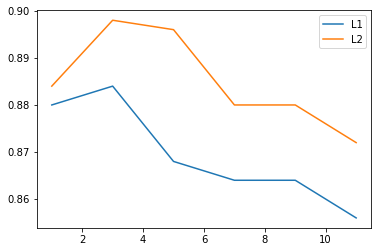

In [20]:
l1 = np.loadtxt('l1_acc.txt')
l2 = np.loadtxt('l2_acc.txt')

plt.plot(k_list, l1)
plt.plot(k_list, l2)
plt.legend(['L1', 'L2'])
plt.show()